In [1]:
import cv2
import numpy as np
from PIL import Image
from pathlib import Path

from ultralytics import YOLO
from ultralytics.yolo.utils.plotting import colors, Annotator

In [2]:
models_dir = Path('./models')
models_dir.mkdir(exist_ok=True)

DET_MODEL_NAME = 'park_best'

det_model = YOLO(models_dir/f'{DET_MODEL_NAME}.pt')
label_map = det_model.model.names

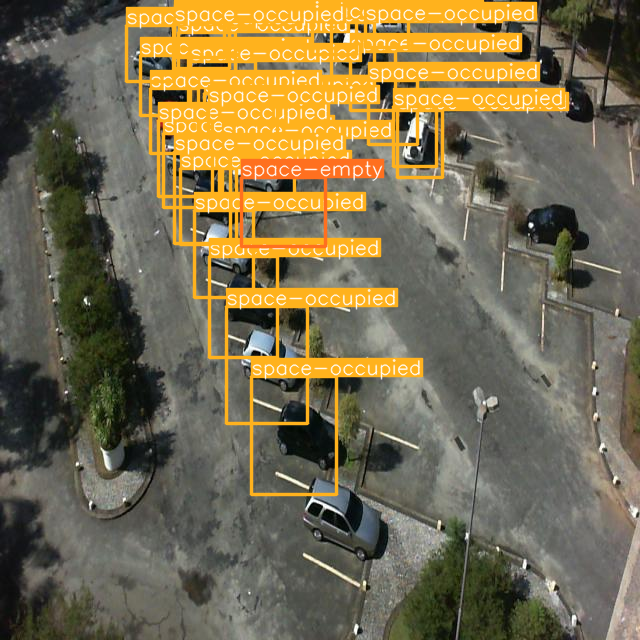

In [3]:
img = cv2.imread('./data2/park-test7.jpg')

results = det_model.predict(img, verbose=False)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


for r in results:
    
    print()
    annotator = Annotator(img)


    boxes = r.boxes
    for box in boxes:

        b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        c = box.cls
        class_name = det_model.names[int(c)]
        annotator.box_label(box = b, label = class_name, color = colors(int(c)+2))


frame = annotator.result() 
Image.fromarray(frame)
